In [2]:
import geopandas as gpd
import pandas as pd
import os
import numpy as np

# Load the GeoJSON file for West Bengal boundaries
geojson_file = "WEST BENGAL_DISTRICTS.geojson"
gdf = gpd.read_file(geojson_file)
gdf = gdf.to_crs(epsg=4326)

# Path to the directory containing CSV files
directory_path = "2013_mrt_csv_with_utci"

# Initialize a list to store the heatmaps as arrays
heatmaps = []

# Loop through all CSV files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)
        data = pd.read_csv(file_path)
        data['time'] = pd.to_datetime(data['time'])

        # Process all available data in the file
        grouped_data = data.groupby(data['time'].dt.date)

        for date, group in grouped_data:
            # Create the heatmap pivot table
            heatmap_mrt = group.pivot_table(index='lat', columns='lon', values='mrt')

            # Convert the heatmap into a NumPy array
            heatmap_array = heatmap_mrt.to_numpy()

            # Append the array to the list of heatmaps
            heatmaps.append(heatmap_array)

# Convert the list of heatmaps into an N-dimensional NumPy array
nd_heatmaps = np.stack(heatmaps)

# Print the shape of the N-dimensional array
print("Shape of N-dimensional heatmap array:", nd_heatmaps.shape)

# Save the N-dimensional array to a file (optional)
np.save("heatmaps_array.npy", nd_heatmaps)
print("Heatmap array saved as 'heatmaps_array.npy'.")

# Example: Access a specific heatmap
if len(nd_heatmaps) > 0:
    print("First heatmap array:")
    print(nd_heatmaps[0])


Shape of N-dimensional heatmap array: (91, 27, 19)
Heatmap array saved as 'heatmaps_array.npy'.
First heatmap array:
[[310.40261917 310.005545   310.005545   310.39926208 310.613915
  312.1000575  307.50728583 306.42102958 306.57856708 306.65081958
  306.55129417 306.55129417 306.40865958 306.31367417 306.2776475
  306.32300375 306.44792083 306.61128417 306.78849625]
 [308.49317292 308.12403167 308.12403167 309.84462917 310.10047833
  309.41888708 306.9974375  306.57358667 306.75090333 306.8348775
  306.77617417 306.77617417 306.66014833 306.58689292 306.55991083
  306.60332167 306.76994458 306.99400958 307.18885333]
 [307.44068667 308.58569583 308.58569583 308.81427208 309.03645208
  310.60722333 307.46544458 306.75667625 306.87108833 306.92180292
  306.89296583 306.89296583 306.82424708 306.78989208 306.76487625
  306.78725458 306.96730958 307.2350875  307.47724875]
 [307.48699792 308.02520167 308.02520167 306.57198375 307.28897542
  310.08869375 310.22067    310.35749708 309.8903966

Shape of the N-dimensional heatmap array: (91, 27, 19)
First heatmap array:


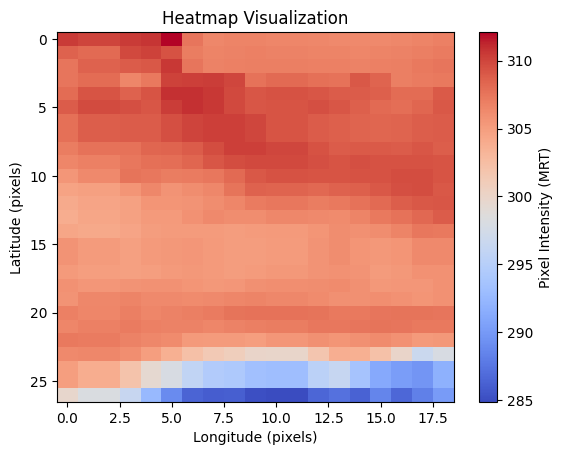

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
heatmaps_array = np.load("heatmaps_array.npy")

# Check the shape of the array
print("Shape of the N-dimensional heatmap array:", heatmaps_array.shape)

# Access a specific heatmap (e.g., the first one)
first_heatmap = heatmaps_array[0]

# Print the first heatmap array (optional)
print("First heatmap array:")
# print(first_heatmap)

# Visualize the first heatmap using matplotlib
plt.imshow(first_heatmap, cmap="coolwarm", aspect='auto')
plt.colorbar(label='Pixel Intensity (MRT)')
plt.title("Heatmap Visualization")
plt.xlabel("Longitude (pixels)")
plt.ylabel("Latitude (pixels)")
plt.show()


In [6]:
print(first_heatmap)

[[310.40261917 310.005545   310.005545   310.39926208 310.613915
  312.1000575  307.50728583 306.42102958 306.57856708 306.65081958
  306.55129417 306.55129417 306.40865958 306.31367417 306.2776475
  306.32300375 306.44792083 306.61128417 306.78849625]
 [308.49317292 308.12403167 308.12403167 309.84462917 310.10047833
  309.41888708 306.9974375  306.57358667 306.75090333 306.8348775
  306.77617417 306.77617417 306.66014833 306.58689292 306.55991083
  306.60332167 306.76994458 306.99400958 307.18885333]
 [307.44068667 308.58569583 308.58569583 308.81427208 309.03645208
  310.60722333 307.46544458 306.75667625 306.87108833 306.92180292
  306.89296583 306.89296583 306.82424708 306.78989208 306.76487625
  306.78725458 306.96730958 307.2350875  307.47724875]
 [307.48699792 308.02520167 308.02520167 306.57198375 307.28897542
  310.08869375 310.22067    310.35749708 309.89039667 307.72769
  308.12696375 308.12696375 307.78036292 307.71362167 309.01828833
  308.40492458 306.91249833 307.122402

Visualizing

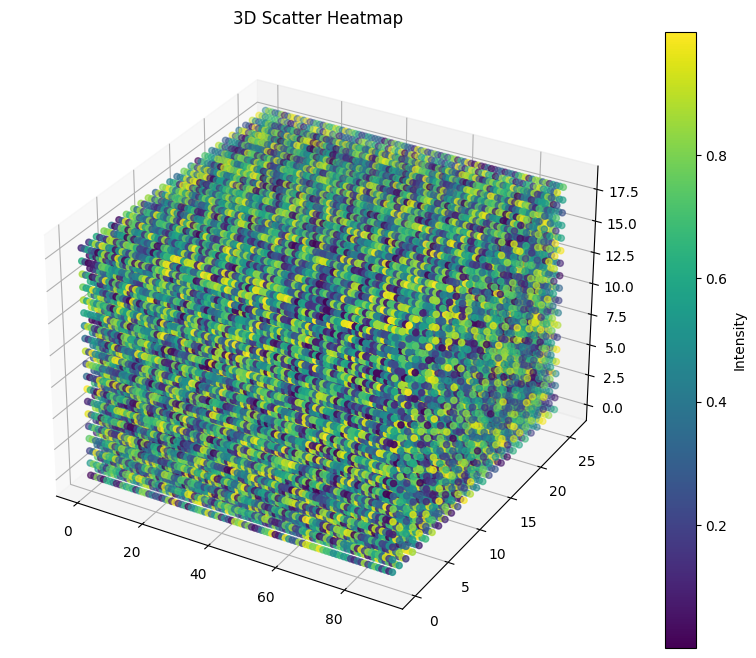

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data (replace this with your actual array)
data = np.random.rand(91, 27, 19)

# Generate coordinates for each point
x, y, z = np.meshgrid(range(91), range(27), range(19), indexing='ij')

# Flatten arrays for scatter plot
x = x.ravel()
y = y.ravel()
z = z.ravel()
values = data.ravel()

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=values, cmap='viridis')

# Add color bar
plt.colorbar(scatter, ax=ax, label='Intensity')
plt.title("3D Scatter Heatmap")
plt.show()
